In [1]:
import numpy as np 
import pandas as pd 

# HIZLI ÇÖZÜM

In [4]:
V1 = np.array([1, 3, 6, np.NaN, 7, 1, np.NaN, 9, 15])
V2 = np.array([7, np.NaN, 5, 8, 12, np.NaN, np.NaN, 2, 3])
V3 = np.array([np.NaN, 12, 5, 6, 14, 7, np.NaN, 2, 31])
df = pd.DataFrame(
    {"V1" : V1,
    "V2" : V2,
    "V3" : V3}
)

In [32]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [6]:
# Değişkenlerdeki eksik değerlere erişmek
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [7]:
# Değeri tam olanların sayısına ulaşmak
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [8]:
# Toplam eksik değer sayısı
df.isnull().sum().sum()

7

In [9]:
# Verinin çok olduğu yapılarda, birden farklı değişkende, onlarca yüzlerce gözlemde eksiklik olabilir. Amacımız gözlemleyebilmek adına bu eksik değerleri barındıran gözlem değerlerine gitmek, eksik gözlem bulunan satırları listelemek görmek
df.isnull()

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [10]:
# df.isnull() sorgusu dataframe içine alınarak bu işlem yapılır.
df[df.isnull().any(axis = 1)] # axis = 1 en az bir tane eksik değer varsa seç

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [11]:
# Tüm değerleri tam olan gözlemler
df[df.notnull().all(axis = 1)]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [12]:
df[df["V1"].notnull() & df["V2"].notnull() &df["V3"].notnull()]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


# Esik Değerlerin SİLİNMESİ

In [23]:
# df.dropna(inplace=True) # inplace = True -> Kalıcı olarak siler
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [14]:
# Bir gözlem de sadece bir tane bile eksik bir değer varsa gözlem birimini siler dropna()

In [17]:
df

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


# Basit DEĞER ATAMA

In [24]:
# VERİYİ SIFIRLAYARAK DEVAM ET
df["V1"]

0     1.0
1     3.0
2     6.0
3     NaN
4     7.0
5     1.0
6     NaN
7     9.0
8    15.0
Name: V1, dtype: float64

In [25]:
df["V1"].mean()

6.0

In [27]:
df["V1"].fillna(df["V1"].mean())
# V1 in ortalamsıyla doldurma

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [29]:
df["V2"].fillna(0)

0     7.0
1     0.0
2     5.0
3     8.0
4    12.0
5     0.0
6     0.0
7     2.0
8     3.0
Name: V2, dtype: float64

In [30]:
# Elimizde birden fazla onlarca değişken olursa, otomatik olarak bu işlemi nasıl yapabiliriz?
# apply ve lambda mimarisi ile yapabiliriz.
# VERİYİ SIFIRLAYARAK DEVAM ET

In [33]:
df.apply(lambda x: x.fillna(x.mean()), axis=0) 
# apply() sütünların üzerinde işlem yapılacak demektir
# axis = 0 satırlara göre işlem yapacak

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


# EKSİK VERİ YAPISININ GÖRSELLEŞTİRİLMESİ
## Rassallığın incelenmesi
### NOT: BAŞLAMADAN ÖNCE VERİLERİ SIFIRLA

In [37]:
!pip install missingno
# Görselleştirme için

In [1]:
import missingno as msno

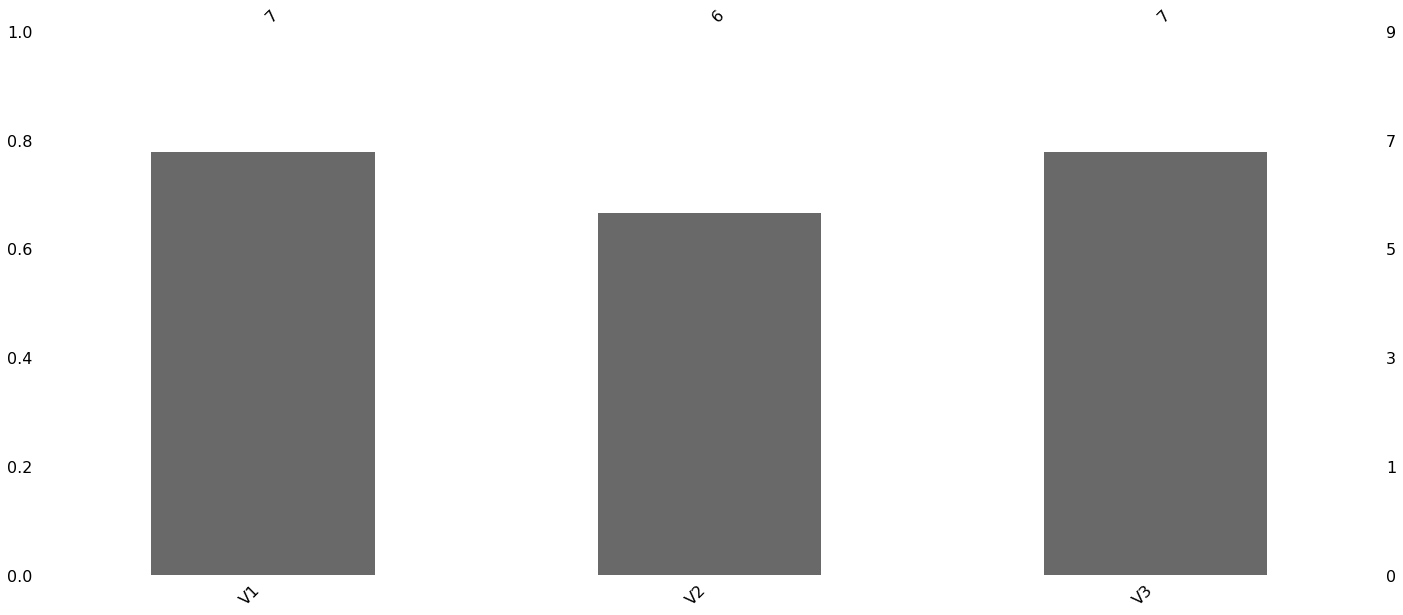

In [5]:
msno.bar(df);

In [6]:
# Grafiğin üst tarafında bulunan rakamlar kaç tane tam gözlem olduğunu veriyor.
# Sağ taraf gözlem sayısını
# Sol taraf tam gözlem sayısı yüzdesini vermektedir.
# Genel hatlarıylar bilgiler vermektedir.

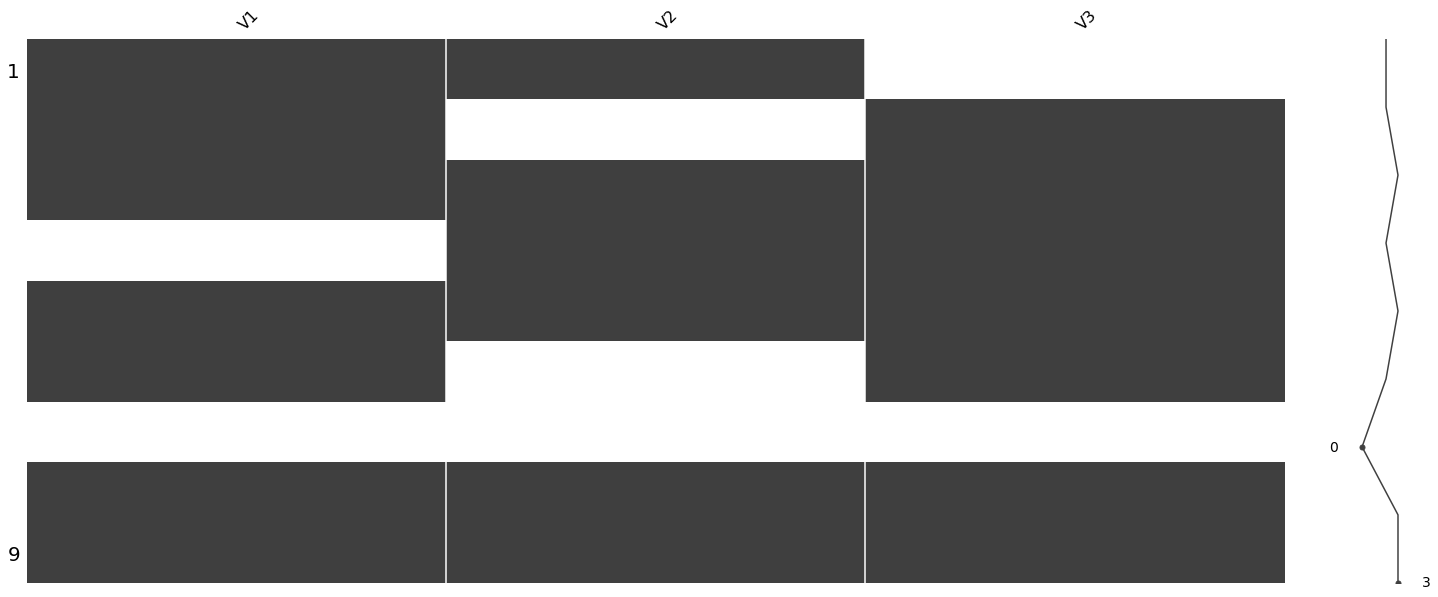

In [7]:
 msno.matrix(df);
 # Eksik değerlerin rassallığı ile ilgili gerekli yapısal bozuklukları yakalayabilme imkanı veren bir görseldir.
 # Soldaki eksen gözlem birimleridir
 # Beyazlıklar gözlemlerdeki boşlukları ifade etmektedir.
 # Sağ taraf aynı anda dolu olan değerlerdir. Ör. 0 ve 3 var. Sıralı 3 gözlemde dolu demektir.

In [9]:
import seaborn as sns 
df = sns.load_dataset('planets')
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [10]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

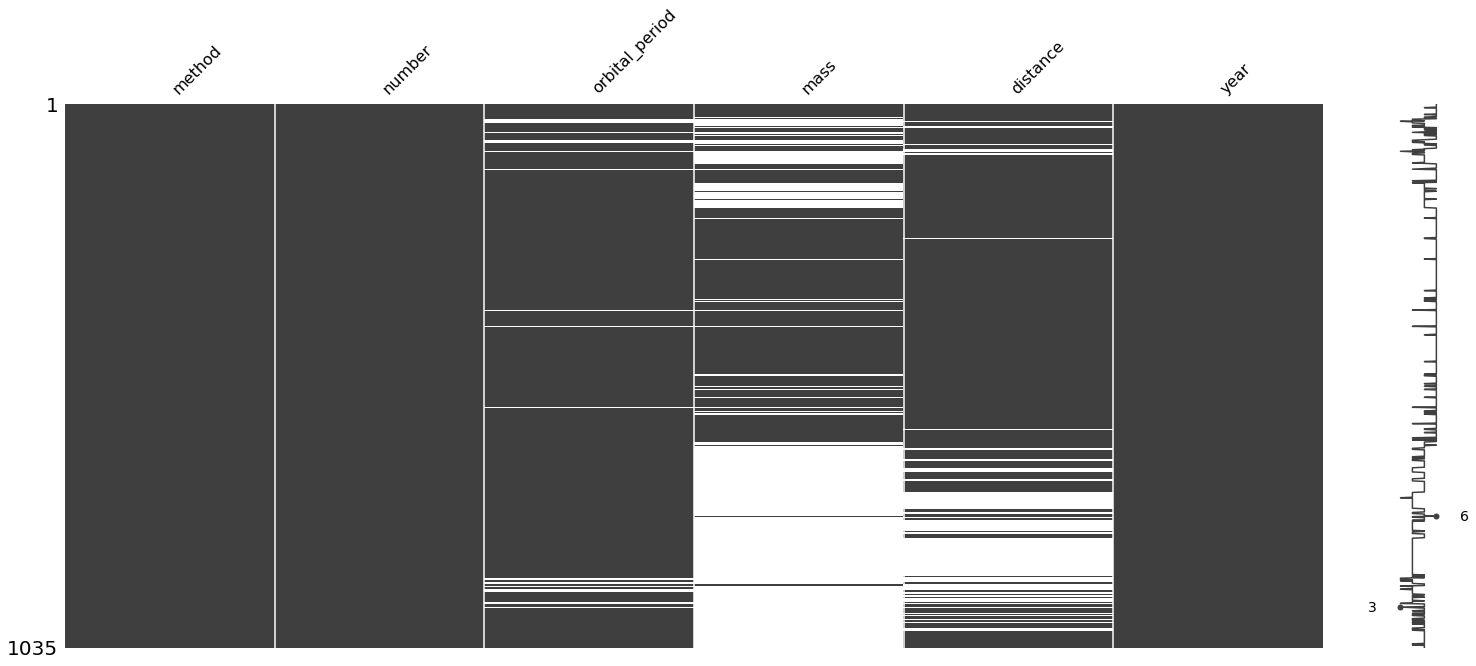

In [11]:
msno.matrix(df);
# Aynı anda 6 tane dolu olma ve aynı anda 3 tane boş olma durumu var. Bunlar referans alınacak sayılardır.

In [12]:
# Grafik yakından incelendiğinde orbital_period da boşluk olduğunda mass ta da bir boşluk var. Fakat mass ta boşluk olduğunda orbital_period da yok. 
# Bu da şöyle yorumlanır orbital_period ile mass arasında ilişki var.
# Mass ve distance arasında net bir ilişki olmasa da bir bağımlılık var.

In [13]:
# SONUÇ OLARAK : Değişkenler arasında ilişki olduğu için bu verisetindeki eksik değerlerin rastgele oluşmadığı yorumunu yapıyoruz.

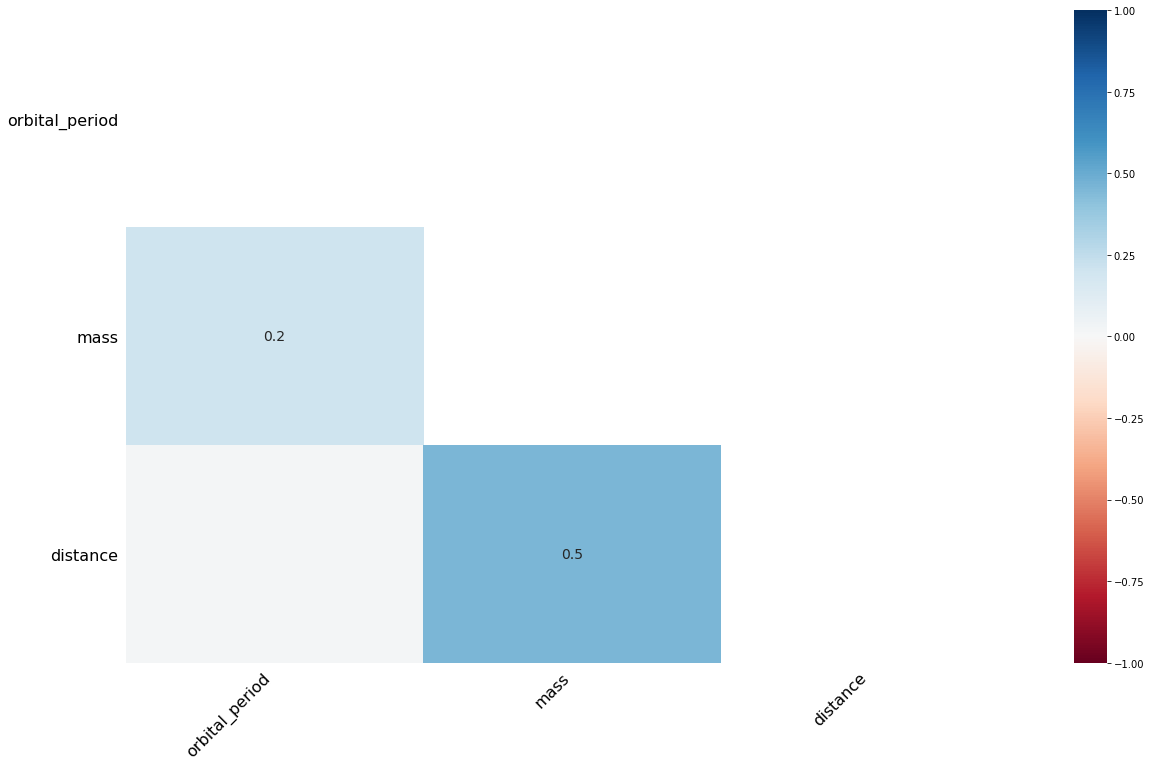

In [14]:
msno.heatmap(df);

In [15]:
# Isıharitası bize nullity-yokluk-boşluk-eksiklik corelation-ilişki isminde bir korelasyon-ilişki değeri verir. Bu değerler +-1 arasındadır. 

In [16]:
# distance ile mass değişkeni arasında 0.5

In [17]:
# Eğer iki değişkenin nullity coralation değeri 1 (bir) ise bu iki değişkenin eksikliği çok yüksek korelasyonla birlikte birlikte meydana geliyor anlamına gelir. Yani bir değişkende eksiklik varsa çok yüksek bir ihtimalle diğer değişkende de eksiklik göreceksiniz anlamaına gelir.

In [18]:
# 0 (sıfır) ile aralarında korelasyon yoktur.
# BU VERİ SETİ RASSAL DEĞİLDİR.

# Sayısal Değişkenler İçin
## Eksik Veriyi Silme Yöntemleri

In [2]:
V1 = np.array([1, 3, 6, np.NaN, 7, 1, np.NaN, 9, 15])
V2 = np.array([7, np.NaN, 5, 8, 12, np.NaN, np.NaN, 2, 3])
V3 = np.array([np.NaN, 12, 5, 6, 14, 7, np.NaN, 2, 31])
df = pd.DataFrame(
    {"V1" : V1,
    "V2" : V2,
    "V3" : V3}
)

In [3]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [4]:
#En az bir tane eksik değere sahip tüm gözlemlerin silinmesi
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [5]:
# Tüm gözlem değerleri eksik olan gözlemlerin silinmesi
df.dropna(how = "all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [6]:
# Değişkenler bazında silme işlemi
df.dropna(axis = 1)
# Sütünda en az 1 eksik değer olanları sil. Bu bütün gözlemleri silecektir çünkü hepsinde en az bir tane eksik değer var

""
0
1
2
3
4
5
6
7
8


In [7]:
# Tüm değerleri NA olan değişkenleri silme
df.dropna(axis = 1, how = "all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [8]:
df["sil_beni"] = np.nan # tüm değerleri NaN olan bir değişken oluşturur.

In [9]:
df

,V1,V2,V3,sil_beni
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,NaN
2,6.0,5.0,5.0,NaN
3,NaN,8.0,6.0,NaN
4,7.0,12.0,14.0,NaN
5,1.0,NaN,7.0,NaN
6,NaN,NaN,NaN,NaN
7,9.0,2.0,2.0,NaN
8,15.0,3.0,31.0,NaN


In [12]:
df.dropna(axis=1, how = "all", inplace=True)

# Eksik Değerlere Basit Değer Atama

In [2]:
V1 = np.array([1, 3, 6, np.NaN, 7, 1, np.NaN, 9, 15])
V2 = np.array([7, np.NaN, 5, 8, 12, np.NaN, np.NaN, 2, 3])
V3 = np.array([np.NaN, 12, 5, 6, 14, 7, np.NaN, 2, 31])
df = pd.DataFrame(
    {"V1" : V1,
    "V2" : V2,
    "V3" : V3}
)

In [14]:
# Sayısal değişkenlerde atama işlemleri
df["V1"].fillna(0)

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [16]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [17]:
# Tüm değişkenlerin kendi ortalamasıyla doldurulması, sütün 
df.apply(lambda x: x.fillna(x.mean()), axis=0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


### Tüm Değişkenler için Birinci I. Yol

In [3]:
# fillna vektörel bir fonksiyondur.
# Bütün değişkenleri, herbir değişkenin ortalamasına doldurma.
df.fillna(df.mean()[:]) 

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


### Tüm Değişkenler için İkinci II. Yol

In [6]:
# V1 ve V2 dağılımları simetrik ise ortalama ile doldurma
# V3 medyana göre - simetrik olmadığı için
df.fillna(df.mean()["V1":"V2"])


,V1,V2,V3
0,1.0,7.000000,NaN
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [7]:
df["V3"].fillna(df["V3"].median())

0     7.0
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6     7.0
7     2.0
8    31.0
Name: V3, dtype: float64

### Tüm Değişkenler için Üçüncü III. Yol

In [10]:
df.where(pd.notna(df), df.mean(), axis="columns")
# Eksik değişkenleri o değişkenlerin ortalamasıyla doldurur.

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


# Kategorik Değişken Kırılımında Değer  Atama ( Sayısal Verileri Kategorik Değişkenlere Göre Doldurma )

### Atanacak olan veri alt ve üst sınırların üstündeyse, ortalamayla doldurmak yanlış olacaktır. Ama başka bir kategorinin ortalamasına göre yapılabilir. Yani bir şirketteki bir kişinin maaşı çok üst ya da çok alt seviyede olabilir. Eksik veriyi bütün personelin ortalamasına göre doldurmak yerine bir departmanın ortalamasna göre doldurmak daha iyi olacaktır.


In [12]:
V1 = np.array([1, 3, 6, np.NaN, 7, 1, np.NaN, 9, 15])
V2 = np.array([7, np.NaN, 5, 8, 12, np.NaN, np.NaN, 2, 3])
V3 = np.array([np.NaN, 12, 5, 6, 14, 7, np.NaN, 2, 31])
V4 = np.array(["IT", "IT", "IK", "IK", "IK","IK","IK","IT","IT"])
df = pd.DataFrame(
    {"maas" : V1,
    "V2" : V2,
    "V3" : V3,
    "departman" : V4}
)
df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [13]:
# Departmanlara göre maaş ortalamaları
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [15]:
# Departman ortalamalarına göre maaşları doldur.
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

In [17]:
V1 = np.array([1, 3, 6, np.NaN, 7, 1, np.NaN, 9, 15])
V4 = np.array(["IT", np.NaN, "IK", "IK", "IK","IK","IK","IT","IT"], dtype=object)
df = pd.DataFrame(
    {"maas" : V1,
    "departman" : V4}
)
df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [19]:
# Mod İşlemi -> Kategorik değişkendeki en sık gözlenen değerin atanması
df["departman"].mode()[0]


'IK'

In [20]:
df["departman"].fillna(df["departman"].mode()[0])

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [24]:
# Eksik değerin öncesindeki ya da sonrasındaki değerle doldurulabilir.
df["departman"].fillna(method="bfill")

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [25]:
df["departman"].fillna(method = "ffill")

0    IT
1    IT
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object